<a href="https://colab.research.google.com/github/ziedjouini/clustering/blob/main/3_1_ML_Clustering_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'

In [ ]:
data = pd.read_csv(url)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
from sklearn.cluster import KMeans
modelKM = KMeans(n_clusters=3)

X = data.select_dtypes(include='number')

modelKM.fit(X)

KMeans(n_clusters=3)

In [ ]:
X.shape

(150, 4)

In [ ]:
modelKM.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


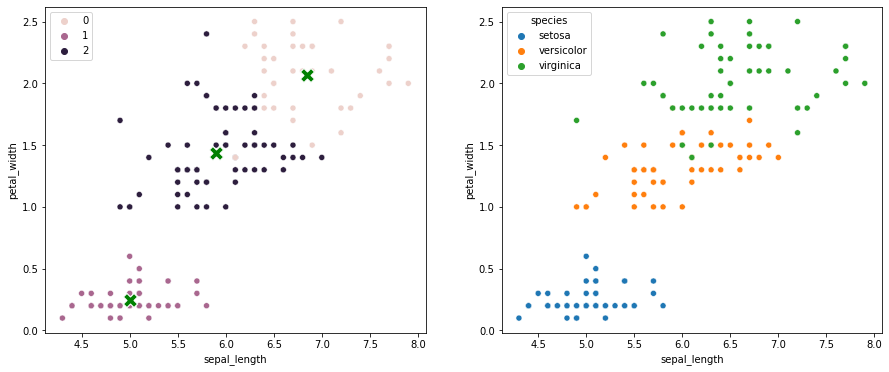

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.scatterplot(X['sepal_length'],X['petal_width'],hue= modelKM.labels_)
sns.scatterplot(modelKM.cluster_centers_[:,0],modelKM.cluster_centers_[:,3], marker = "X",s=200,color='g')

plt.subplot(122)
sns.scatterplot(data=X, x=X['sepal_length'],y=X['petal_width'],hue= data.species)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


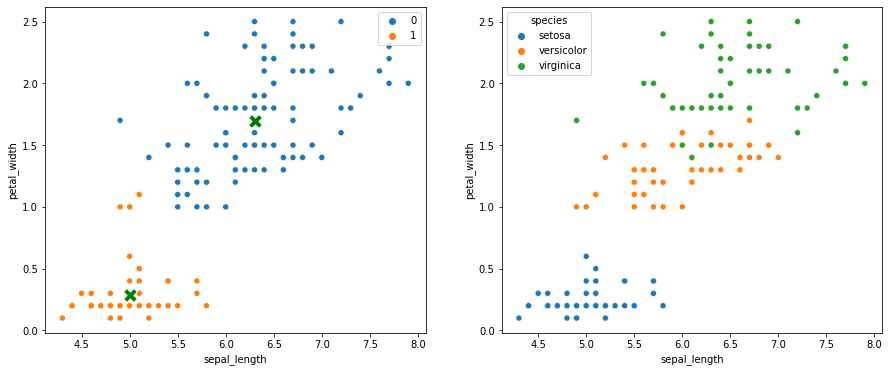

In [ ]:
# idem 2 clusters
modelKM = KMeans(n_clusters=2)
X = data.select_dtypes(include='number')
modelKM.fit(X)

plt.figure(figsize=(15,6))
plt.subplot(121)
sns.scatterplot(X['sepal_length'],X['petal_width'],hue= modelKM.labels_)
sns.scatterplot(modelKM.cluster_centers_[:,0],modelKM.cluster_centers_[:,3], marker = "X",s=200,color='g')

plt.subplot(122)
sns.scatterplot(data=X, x=X['sepal_length'],y=X['petal_width'],hue= data.species)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


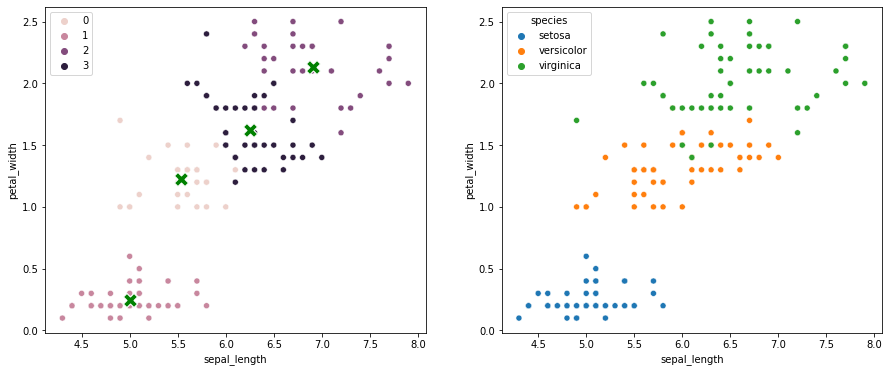

In [ ]:
# idem 4 clusters
modelKM = KMeans(n_clusters=4)
X = data.select_dtypes(include='number')
modelKM.fit(X)

plt.figure(figsize=(15,6))
plt.subplot(121)
sns.scatterplot(X['sepal_length'],X['petal_width'],hue= modelKM.labels_)
sns.scatterplot(modelKM.cluster_centers_[:,0],modelKM.cluster_centers_[:,3], marker = "X",s=200,color='g')

plt.subplot(122)
sns.scatterplot(data=X, x=X['sepal_length'],y=X['petal_width'],hue= data.species)

In [ ]:
result=[]
for k in range(2,10):
  modelKM = KMeans(n_clusters=k)
  X = data.select_dtypes(include='number')
  modelKM.fit(X)
  result.append(modelKM.inertia_)

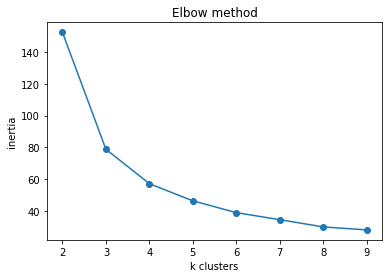

In [ ]:
plt.plot(range(2,10),result,'-o')
plt.ylabel('inertia')
plt.xlabel('k clusters')
plt.title('Elbow method');

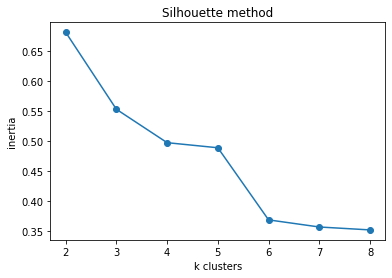

In [ ]:
# Ici, nous faisons une boucle pour afficher le score Silhouette
# pour un nombre de clusters entre 2 et 8
from sklearn.metrics  import silhouette_score
result=[]
for k in range(2,9):
    modelKM = KMeans(n_clusters=k, random_state=3)
    modelKM.fit(X)
    result.append(silhouette_score(X, modelKM.labels_))
plt.plot(range(2,9),result,'-o')
plt.ylabel('inertia')
plt.xlabel('k clusters')
plt.title('Silhouette method');